<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import glob
import pickle
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import copy
import pandas as pd

def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

In [2]:
import seaborn as sns
sns.set()
sns.set_style('white')
sns.set_style('ticks')
plt.style.use('../my_rcparams.mplstyle')

In [3]:
apath = glob.glob('../../data_final/fig4_panel_a_v2.pkl') #panel_fig4_exp_data
panel_a = pickle.load(open(apath[0],'rb'))
bpath = glob.glob('../../data_final/panel_fig4_int_data.pkl')
panel_b = pickle.load(open(bpath[0],'rb'))

In [4]:
dpi = 1000
figtextsize=10

In [5]:
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.colors as colors
cmap = matplotlib.cm.get_cmap('YlGn_r')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/opt/conda/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


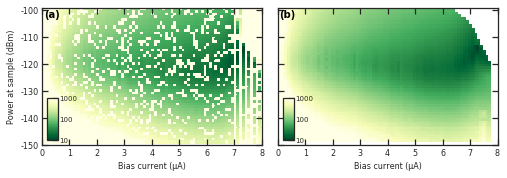

In [6]:
plt.style.use('../my_rcparams.mplstyle')

# parameters for 2D plots:
minP,maxP=-150,-99
minI,maxI=0,8
# min and max values for colorscale
# lineparameters
vmin = 10
vmax = 1000
levels = [20,50,1e2,1e3]
levc = 'k'
levalp=1
levst = 'dashed'
levlw = .2
levft = 8

fig=plt.figure(figsize=cm2inch(17.6,6),constrained_layout=True)
gs = fig.add_gridspec(1, 2, wspace=0.05)

# RAW 2D
axa = fig.add_subplot(gs[0,0])
pcm1 = plt.pcolormesh(panel_a['x'],panel_a['y'],panel_a['z'],
               cmap=cmap,linewidth=0,rasterized=True,norm=colors.LogNorm(vmin=vmin, vmax=vmax),zorder=-1)
plt.xlabel(panel_a['xlabel'])
plt.ylabel(panel_a['ylabel'])
plt.xlim(minI,maxI)
plt.ylim(minP,maxP)

# INTERPOLATION 2D
axb = fig.add_subplot(gs[0,1])
pcm2 = plt.pcolormesh(panel_b['x'],panel_b['y'],panel_b['z'],
               cmap=cmap,linewidth=0,rasterized=True,norm=colors.LogNorm(vmin=vmin, vmax=vmax),zorder=-1)
plt.xlabel(panel_b['xlabel'])
# plt.ylabel(panel_b['ylabel'])
plt.gca().set_yticklabels([])
plt.xlim(minI,maxI)
plt.ylim(minP,maxP)


axinsA = inset_axes(axa, width="5%", height="30%", loc=3) 
cbarA = plt.colorbar(pcm1,cax=axinsA)

axinsB = inset_axes(axb, width="5%", height="30%", loc=3) 
cbarB = plt.colorbar(pcm2,cax=axinsB)

for cbar in [cbarA,cbarB]:
    cbar.minorticks_off()
    cbar.set_ticks([10,100,1000])
    cbar.ax.tick_params(pad=1)
    cbar.ax.set_yticklabels([10,100,1000],fontsize=7)
# cbar.set_label(panel_d['zlabel'],fontsize=7)


axa.text(0.045,0.95, '(a)', fontsize=figtextsize, color='black', weight='bold',transform=axa.transAxes, verticalalignment = 'center', horizontalalignment = 'center')
axb.text(0.045,0.95, '(b)', fontsize=figtextsize, color='black', weight='bold', transform=axb.transAxes, verticalalignment = 'center', horizontalalignment = 'center')

plt.savefig('SM_interpolation.pdf',bbox_inches='tight',dpi=dpi)
plt.show()
plt.close()